In [1]:
import torch
import torch.nn.functional as F

In [2]:
predictions = torch.rand(3)
predictions

tensor([0.8422, 0.2536, 0.1555])

In [3]:
F.softmax(predictions, dim=-1)

tensor([0.4858, 0.2697, 0.2445])

In [9]:
predictions = torch.log(torch.rand(3))

In [10]:
predictions

tensor([-1.0008, -0.2888, -4.3640])

In [14]:
print(F.softmax(predictions, dim=-1))
print(F.softmax(predictions / 0.5, dim=-1))
print(F.softmax(predictions / 0.1, dim=-1))

tensor([0.3254, 0.6633, 0.0113])
tensor([1.9397e-01, 8.0580e-01, 2.3255e-04])
tensor([8.0759e-04, 9.9919e-01, 2.0002e-18])


In [17]:
print(F.softmax(predictions, dim=-1))
print(F.softmax(predictions / 10, dim=-1))
print(F.softmax(predictions / 100, dim=-1))

tensor([0.3254, 0.6633, 0.0113])
tensor([0.3587, 0.3851, 0.2562])
tensor([0.3362, 0.3386, 0.3251])


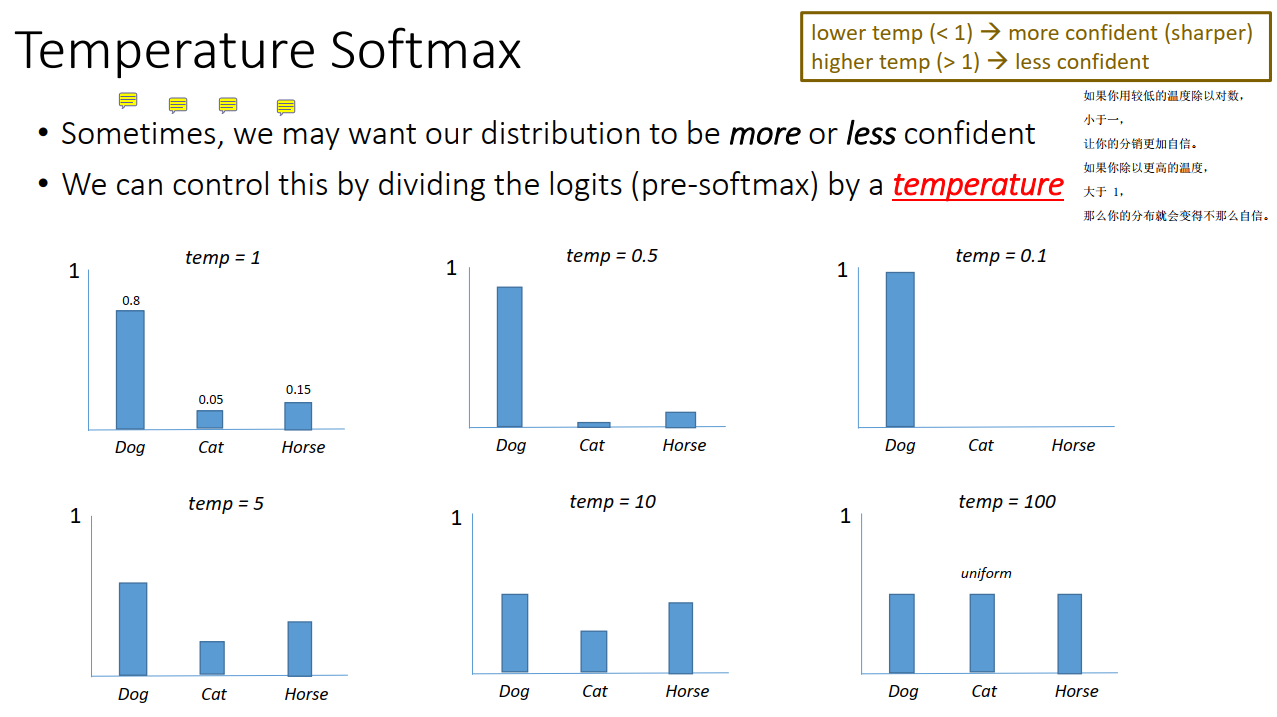
这张图片解释了**Temperature Softmax**的概念。

### 主要内容
1. **目的**:
   - 有时候，我们希望模型的输出分布更加自信（更尖锐）或不那么自信（更平滑）。
   - 我们可以通过在应用Softmax之前，将logits（未归一化的预测值）除以一个温度参数（temperature）来控制这一点。

2. **温度参数的影响**:
   - **较低的温度（< 1）**: 使得分布更加自信（更尖锐）。
   - **较高的温度（> 1）**: 使得分布不那么自信（更平滑）。

### 图示说明
图片中展示了不同温度参数下的Softmax输出分布：

1. **temp = 1**:
   - Dog: 0.8
   - Cat: 0.05
   - Horse: 0.15
   - 这是标准的Softmax输出。

2. **temp = 0.5**:
   - Dog的概率更高，Cat和Horse的概率更低，分布更加尖锐。

3. **temp = 0.1**:
   - Dog的概率几乎为1，Cat和Horse的概率几乎为0，分布非常尖锐。

4. **temp = 5**:
   - Dog, Cat和Horse的概率更加接近，分布更加平滑。

5. **temp = 10**:
   - Dog, Cat和Horse的概率更加接近，分布更加平滑。

6. **temp = 100**:
   - Dog, Cat和Horse的概率几乎相等，分布非常平滑，接近均匀分布。

### 总结
通过调整温度参数，我们可以控制模型输出的置信度。较低的温度使得模型更加自信，较高的温度使得模型不那么自信。

这里的**temperature**参数在LLM（大型语言模型）和深度学习中都有类似的应用。

### 在LLM中的应用
在大型语言模型（如GPT-3）中，temperature参数用于控制生成文本的多样性和随机性。具体来说：

- **较低的temperature（< 1）**: 生成的文本更加确定和自信，模型倾向于选择概率最高的词。这会使得生成的文本更加一致，但可能缺乏多样性。
- **较高的temperature（> 1）**: 生成的文本更加随机和多样化，模型会更频繁地选择概率较低的词。这会增加生成文本的多样性，但可能会导致一些不太合理的输出。

### 在深度学习中的应用
在深度学习中，temperature参数常用于Softmax函数，以控制模型输出的置信度。具体应用包括：

- **知识蒸馏（Knowledge Distillation）**: 在知识蒸馏过程中，temperature参数用于软化教师模型的输出，使得学生模型能够更好地学习教师模型的知识。
- **生成模型**: 在生成模型中，temperature参数用于控制生成样本的多样性和随机性。

### 总结
无论是在LLM还是在深度学习中，temperature参数都是一个重要的调节工具，用于控制模型输出的置信度和多样性。通过调整temperature参数，可以在生成确定性和多样性之间找到平衡。

选择合适的temperature参数取决于具体的应用场景和目标。以下是一些建议和考虑因素：

### 一般建议
1. **探索和实验**:
   - 不同的任务和数据集可能需要不同的temperature值。通过实验和验证来找到最适合的temperature值是一个常见的做法。
   - 可以从一些常见的值开始，比如0.5、1、2，然后根据结果进行调整。

2. **任务需求**:
   - **生成确定性高的输出**: 如果你希望模型生成的输出更加确定和一致，可以选择较低的temperature值（< 1）。
   - **生成多样性高的输出**: 如果你希望模型生成的输出更加多样化，可以选择较高的temperature值（> 1）。

### 具体应用场景
1. **语言生成（如聊天机器人、文本生成）**:
   - **较低的temperature（0.7-1.0）**: 适用于需要生成连贯和合理文本的场景，如回答问题、生成正式文档等。
   - **较高的temperature（1.0-1.5）**: 适用于需要生成创意和多样化文本的场景，如写作辅助、生成诗歌等。

2. **知识蒸馏**:
   - 在知识蒸馏过程中，通常会选择一个较高的temperature值（如2或更高），以软化教师模型的输出，使学生模型能够更好地学习。

3. **分类任务**:
   - 在分类任务中，temperature参数可以用于调整模型的置信度。较低的temperature值可以使模型的预测更加自信，而较高的temperature值可以使模型的预测更加平滑。

### 实验示例
假设你在进行文本生成任务，可以进行以下实验：
1. **Temperature = 0.7**: 生成的文本可能更加连贯和一致，但可能缺乏多样性。
2. **Temperature = 1.0**: 生成的文本在连贯性和多样性之间取得平衡。
3. **Temperature = 1.3**: 生成的文本可能更加多样化，但可能会出现一些不太合理的输出。

通过比较不同temperature值下的生成结果，你可以选择最适合你的应用场景的temperature值。

### 总结
选择合适的temperature值需要根据具体的任务和目标进行实验和调整。一般来说，较低的temperature值适用于生成确定性高的输出，而较高的temperature值适用于生成多样性高的输出。通过实验和验证，可以找到最适合的temperature值。

In [ ]:
v